In [1]:
# Import the fucking useful libraries =)
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.sparse as sp
import itertools
import math
from MF_SGD import *



# There's a lot of columns in the DF. 
# Therefore, we add this option so that we can see more columns
pd.options.display.max_columns = 100

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
data = load_data('../data/data_train.csv')
print("percent of defined matrix", percent_sparse(data))
print("# non-zeros", data.nnz)
print("it's probably the opposite, 10'000 users for 1'000 movies. Let's verify that.")

number of items: 10000, number of users: 1000
percent of defined matrix 8.496523222697272
# non-zeros 1176952
it's probably the opposite, 10'000 users for 1'000 movies. Let's verify that.


## Split the data

In [3]:
train, test = split_data(data, p_test=0.1)

Total number of nonzero elements in origial data:1176952
Total number of nonzero elements in train data:1059257
Total number of nonzero elements in test data:117695
Percentage of cut:10.00


## Baseline prediction

In [4]:
print("Baseline RMSE prediction")
print("------------------------")
print("global mean: ", baseline_global_mean(train, test))
print("user mean: ", baseline_user_mean(train, test))
print("item mean: ", baseline_item_mean(train, test))
print("------------------------")
print("in HW: ", 1.12653505598, 1.02056979087, 1.0486389103)


Baseline RMSE prediction
------------------------
global mean:  1.12149720274
user mean:  1.10051126665
item mean:  1.03097383173
------------------------
in HW:  1.12653505598 1.02056979087 1.0486389103


## Matrix Factorization using SGD

In [5]:
sub_data = select_subset(data, 0.1)
sub_train, sub_test = split_data(sub_data, 0.1)

Total number of nonzero elements in origial data:1176952
Total number of nonzero elements in train data:1059257
Total number of nonzero elements in test data:117695
Percentage of cut:10.00
Total number of nonzero elements in origial data:117695
Total number of nonzero elements in train data:105926
Total number of nonzero elements in test data:11769
Percentage of cut:10.00


In [19]:
gammas = np.linspace(0.01, 0.1, 10)
# gamma = 0.002
# features = np.arange(1, 20, 5)
feature = 20
iter = 10

train_errors = []
test_errors = []

for gamma in gammas:
    _, _, train_es, test_e = matrix_factorization_SGD(sub_train, sub_test,\
                                                      gamma, n_features=feature, n_iter=iter, \
                                                      init_method = 'movie_mean')
    train_errors.append(train_es[-1])
    test_errors.append(test_e)
    

learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 0.9853281278430003.
iter: 1, RMSE on training set: 0.9768218284382026.
iter: 2, RMSE on training set: 0.9734256120248514.
iter: 3, RMSE on training set: 0.9689985908620664.
iter: 4, RMSE on training set: 0.9646075816900788.
iter: 5, RMSE on training set: 0.9624040655140372.
iter: 6, RMSE on training set: 0.9610263026091159.
iter: 7, RMSE on training set: 0.9581948280240824.
iter: 8, RMSE on training set: 0.9576651994802364.
iter: 9, RMSE on training set: 0.9565204214885936.
RMSE on test data: 1.0476040495003376.
learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 1.0157531775187234.
iter: 1, RMSE on training set: 1.001829266840264.
iter: 2, RMSE on training set: 0.9909334246207918.
iter: 3, RMSE on training set: 0.9837527166431919.
iter: 4, RMSE on training set: 0.9757749198596252.
iter: 5, RMSE on training set: 0.9715349327005781.
iter: 6, RMSE on training set: 0.9684470507702042.
iter: 7

<function matplotlib.pyplot.show>

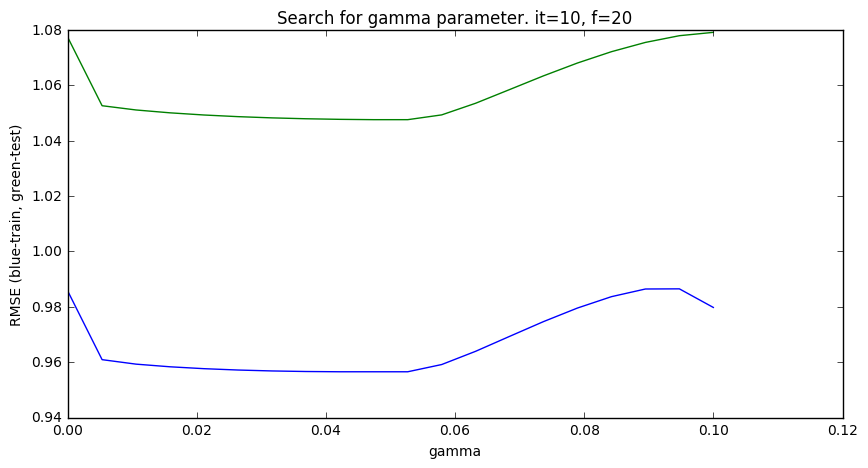

In [38]:
fig = plt.figure(figsize=(10, 5))
plt.plot(saved_gammas, saved_train_errors)
plt.plot(saved_gammas, saved_test_errors)
plt.title("Search for gamma parameter. it=10, f=20")
plt.ylabel("RMSE (blue-train, green-test)")
plt.xlabel("gamma")
plt.show

## test the model on full data



In [45]:
item_features, user_features, train_es, test_e = \
    matrix_factorization_SGD(train, test, 0.004, n_features=20, n_iter=10,init_method = 'movie_mean')

learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 1.0041323047387658.
iter: 1, RMSE on training set: 1.002118718841877.
iter: 2, RMSE on training set: 0.9994263919960905.
iter: 3, RMSE on training set: 0.9977223701887588.
iter: 4, RMSE on training set: 0.9964199856613264.
iter: 5, RMSE on training set: 0.9948119797062183.
iter: 6, RMSE on training set: 0.9946086628948486.
iter: 7, RMSE on training set: 0.9934094421603635.
iter: 8, RMSE on training set: 0.9930388816739618.
iter: 9, RMSE on training set: 0.9923876776282201.
RMSE on test data: 1.00393451650102.


## Total train

In [49]:
item_features, user_features, train_es = \
    matrix_factorization_SGD_full_training(data, 0.004, n_features=20, n_iter=20,init_method = 'global_mean')

full train: matrix factorization using SGD...
iter: 0, RMSE on data set: 0.9967541476964135.
iter: 1, RMSE on data set: 0.9943858753323432.
iter: 2, RMSE on data set: 0.9934414892591069.
iter: 3, RMSE on data set: 0.9928658843989375.
iter: 4, RMSE on data set: 0.9922922560033333.
iter: 5, RMSE on data set: 0.9920000364365197.
iter: 6, RMSE on data set: 0.9916212562231874.
iter: 7, RMSE on data set: 0.9915035708662326.
iter: 8, RMSE on data set: 0.991317564997708.
iter: 9, RMSE on data set: 0.9911919193959823.
iter: 10, RMSE on data set: 0.9911467749806133.
iter: 11, RMSE on data set: 0.9910566754445597.
iter: 12, RMSE on data set: 0.9910097428146496.
iter: 13, RMSE on data set: 0.9909759928479177.
iter: 14, RMSE on data set: 0.9909496832617017.
iter: 15, RMSE on data set: 0.9909293581990334.
iter: 16, RMSE on data set: 0.9909203475743141.
iter: 17, RMSE on data set: 0.9909070880726712.
iter: 18, RMSE on data set: 0.990902056444906.
iter: 19, RMSE on data set: 0.9908975630629757.
Model 

## Prediction

In [50]:
predict(item_features, user_features, "../data/sampleSubmission.csv")

number of items: 10000, number of users: 1000
saved in  pred_MF_SGD


<10000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1176952 stored elements in LInked List format>